# Project Task 1 - Basic Classifiers and Evaluation

1) Prepare the dataset in order to build several basic classifiers able to predict room occupancy from the available variables. You are welcome in creating new variables.

2) Solve the classification task with k-NN (testing values of k), Naive Bayes, Logistic Regression, Decision Tree using cross-validation and/or random/grid search for parameter estimation.

3) Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.

4) Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.

5) Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).

6) Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies.

7) Draw your conclusions about the basic classifiers and techniques adopted in this analysis.

# Project Task 2 - Advanced Classifiers and Evaluation

1) Using the dataset for classification prepared for Task 1 build several advanced classifiers able to predict room occupancy from the available variables. In particular, you are required to use SVM (linear and non-linear), NN (Single and Multilayer Perceptron), DNN (design at least two different architectures), Ensemble Classifier (RandomForest, AdaBoost and a Bagging technique in which you can select a base classifier of your choice with a justification).

2) Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, etc; Draw your conclusion about the classifiers.

3) Highlight in the report different aspects typical of each classifier. For instance for SVM: is a linear model the best way to shape the decision boundary? Or for NN: what are the parameter sets or the convergence criteria suggesting you are avoiding overfitting? How many iterations/base classifiers are needed to allow a good estimation using an ensemble method? Which is the feature importance for the Random Forest?

4) You are NOT required to experiment also in the imbalanced case but if you do it is not considered a mistake.



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

In [2]:
df = pd.read_csv("datatraining.txt")

In [3]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
df.shape

(8143, 7)

In [5]:
df.Occupancy.value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

Text(0, 0.5, 'Occupancy frequency')

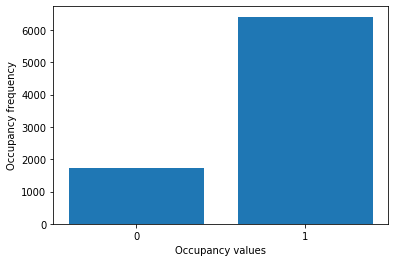

In [6]:
plt.bar(x=df.Occupancy.unique(), height=df.Occupancy.value_counts())
plt.xticks(df.Occupancy.unique())
plt.xlabel('Occupancy values')
plt.ylabel('Occupancy frequency')

In [7]:
dates = pd.to_datetime(df['date'], infer_datetime_format=True)
df['day'] = dates.dt.day
df['hour'] = dates.dt.hour

In [8]:
weekend = []
for i in df.day:
    if i == 7 or i == 8:
        weekend.append(1)
    else:
        weekend.append(0)
weekend = pd.Series(weekend)
df['weekend'] = weekend

In [9]:
daylight = []
for i in df.hour:
    if i >= 7 and i <= 17:
        daylight.append(1)
    else:
        daylight.append(0)
daylight = pd.Series(daylight)
df['daylight'] = daylight

In [10]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,weekend,daylight
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,4,17,0.0,1.0
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,4,17,0.0,1.0
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,4,17,0.0,1.0
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,4,17,0.0,1.0
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,4,17,0.0,1.0


In [11]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,weekend,daylight
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8142.000000,8142.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330,7.075525,11.390642,0.353721,0.425203
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982,1.674896,7.092195,0.478153,0.494404
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,4.000000,0.000000,0.000000,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000,6.000000,5.000000,0.000000,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000,7.000000,11.000000,0.000000,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000,8.000000,18.000000,1.000000,1.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000,10.000000,23.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 11 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
day              8143 non-null int64
hour             8143 non-null int64
weekend          8142 non-null float64
daylight         8142 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 763.4+ KB


In [13]:
df.drop(['HumidityRatio'],inplace=True,axis=1)

In [14]:
df.dropna(axis = 0, inplace = True)

In [15]:
df.reset_index(drop = True)

,date,Temperature,Humidity,Light,CO2,Occupancy,day,hour,weekend,daylight
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,1,4,17,0.0,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,1,4,17,0.0,1.0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,1,4,17,0.0,1.0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,1,4,17,0.0,1.0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,1,4,17,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8137,2015-02-10 09:28:00,21.05,36.0500,433.0,780.250000,1,10,9,0.0,1.0
8138,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,1,10,9,0.0,1.0
8139,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,1,10,9,0.0,1.0
8140,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,1,10,9,0.0,1.0


In [16]:
df = df[['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'day', 'hour', 'daylight']]

In [17]:
df.head()

,Temperature,Humidity,Light,CO2,Occupancy,day,hour,daylight
1,23.18,27.2720,426.0,721.25,1,4,17,1.0
2,23.15,27.2675,429.5,714.00,1,4,17,1.0
3,23.15,27.2450,426.0,713.50,1,4,17,1.0
4,23.15,27.2000,426.0,708.25,1,4,17,1.0
5,23.10,27.2000,426.0,704.50,1,4,17,1.0


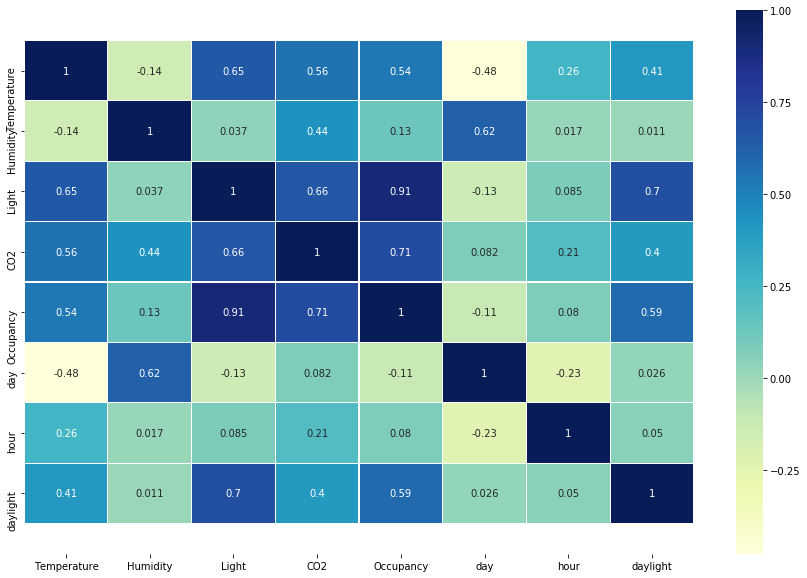

In [18]:
#Correlation Pearson (linear correlation)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot = True, linewidth=0.1, cmap='YlGnBu')
#To fix matplot error
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##
plt.show()

# Data Preparation

In [19]:
def prepare_dataset(df, class_name):
    df = remove_missing_values(df)
    numeric_columns = get_numeric_columns(df)
    rdf = df.copy(deep=True)
    df, feature_names, class_values = one_hot_encoding(df, class_name)
    real_feature_names = get_real_feature_names(rdf, numeric_columns, class_name)
    rdf = rdf[real_feature_names + (class_values if isinstance(class_name, list) else [class_name])]
    features_map = get_features_map(feature_names, real_feature_names)

    return df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map

def remove_missing_values(df):
    for column_name, nbr_missing in df.isna().sum().to_dict().items():
        if nbr_missing > 0:
            if column_name in df._get_numeric_data().columns:
                mean = df[column_name].mean()
                df[column_name].fillna(mean, inplace=True)
            else:
                mode = df[column_name].mode().values[0]
                df[column_name].fillna(mode, inplace=True)
    return df

def get_numeric_columns(df):
    numeric_columns = list(df._get_numeric_data().columns)
    return numeric_columns

def get_real_feature_names(rdf, numeric_columns, class_name):
    real_feature_names = [c for c in rdf.columns if c in numeric_columns and c != class_name]
    real_feature_names += [c for c in rdf.columns if c not in numeric_columns and c != class_name]
    return real_feature_names

def one_hot_encoding(df, class_name):
    dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
    class_name_map = {v: k for k, v in enumerate(sorted(df[class_name].unique()))}
    dfY = df[class_name].map(class_name_map)
    df = pd.concat([dfX, dfY], axis=1, join_axes=[dfX.index])
    feature_names = list(dfX.columns)
    class_values = sorted(class_name_map)
    return df, feature_names, class_values

def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map

In [20]:
class_name = 'Occupancy'

In [21]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


,Temperature,Humidity,Light,CO2,day,hour,daylight,Occupancy
1,23.18,27.2720,426.0,721.25,4,17,1.0,1
2,23.15,27.2675,429.5,714.00,4,17,1.0,1
3,23.15,27.2450,426.0,713.50,4,17,1.0,1
4,23.15,27.2000,426.0,708.25,4,17,1.0,1
5,23.10,27.2000,426.0,704.50,4,17,1.0,1


# Data Partitioning

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [23]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y) # IMPORTANT test_size change shape

In [24]:
X_train.shape

(5699, 7)

# Classification

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9914040114613181
F1-score [0.99456662 0.97943193]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       0.99      0.97      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Variance Threshold

In [41]:
from sklearn.feature_selection import VarianceThreshold

In [42]:
sel = VarianceThreshold(threshold=(.8 * (1 - .4)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(5699, 6)

In [43]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9914040114613181
F1-score [0.99456662 0.97943193]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       0.99      0.97      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Univariate Feature Selection

In [44]:
from sklearn.feature_selection import SelectKBest

In [45]:
sel = SelectKBest(k=4)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(5699, 4)

In [46]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99377916 0.9766537 ]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       0.98      0.97      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Recursive Feature Elimination

In [47]:
from sklearn.feature_selection import SelectFromModel

In [48]:
sel = SelectFromModel(DecisionTreeClassifier(), threshold = 0.008)
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(5699, 5)

In [49]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9914040114613181
F1-score [0.99456662 0.97943193]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       0.99      0.97      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Principal Component Analysis

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [52]:
X_train_pca.shape

(5699, 3)

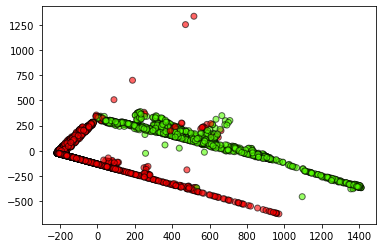

In [53]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.6)
plt.show()

In [54]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9860826852230864
F1-score [0.99118714 0.96692607]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.97      0.96      0.97       518

    accuracy                           0.99      2443
   macro avg       0.98      0.98      0.98      2443
weighted avg       0.99      0.99      0.99      2443



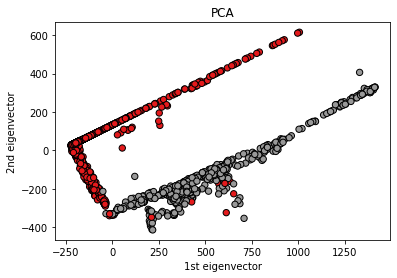

In [55]:
X_pca = PCA(n_components=3).fit_transform(X_test)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

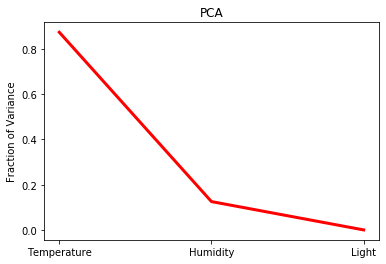

In [56]:
plt.plot(PCA(n_components=3).fit(X_test).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(3), feature_names)
plt.show()

# ROC curve

In [57]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [58]:
y_score = clf.predict_proba(X_test_pca)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

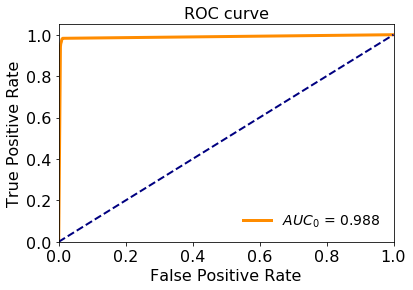

In [59]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Adjust the Decision Threshold

Accuracy 0.9885386819484241
F1-score [0.99277606 0.97227723]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       1.00      0.95      0.97       518

    accuracy                           0.99      2443
   macro avg       0.99      0.97      0.98      2443
weighted avg       0.99      0.99      0.99      2443



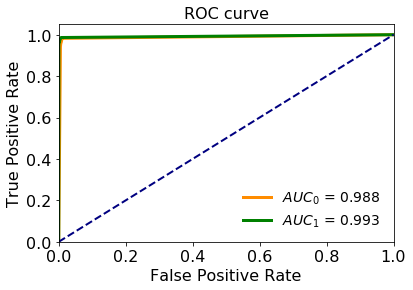

In [60]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.8)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Undersampling

In [61]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.en

# RandomUnderSampler

In [62]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1210, 1: 1210})


C:\Users\bonin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


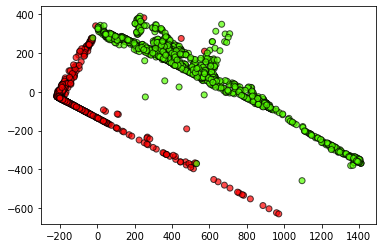

In [63]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9922226770364306
F1-score [0.99505595 0.98178332]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1925
           1       0.98      0.99      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



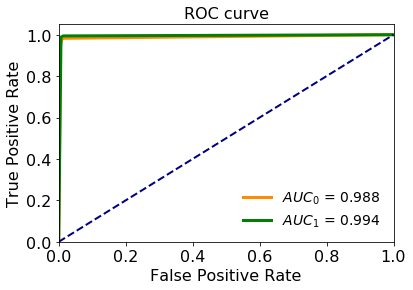

In [64]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# CondensedNearestNeighbour

In [65]:
import warnings
warnings.simplefilter("ignore")

In [66]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 1210, 0: 58})


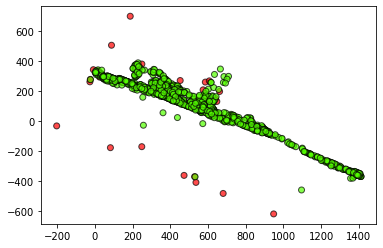

In [67]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9864920180106427
F1-score [0.99142634 0.96817743]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.97      0.97      0.97       518

    accuracy                           0.99      2443
   macro avg       0.98      0.98      0.98      2443
weighted avg       0.99      0.99      0.99      2443



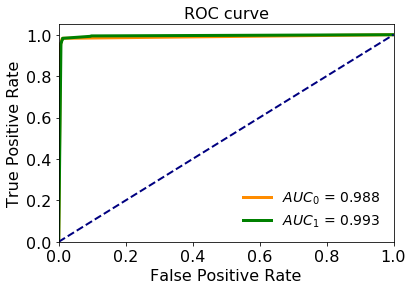

In [68]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Oversampling

In [69]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# RandomOverSampler

In [70]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 4489, 1: 4489})


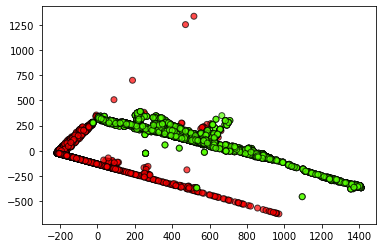

In [71]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9914040114613181
F1-score [0.9945497  0.97967086]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       0.98      0.98      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



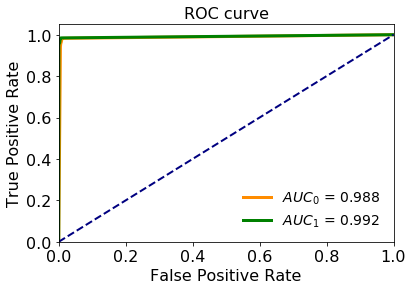

In [72]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# SMOTE

In [73]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 4489, 1: 4489})


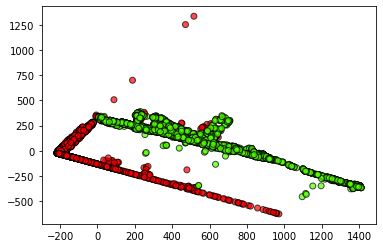

In [74]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9901760130986492
F1-score [0.9937727  0.97674419]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.98      0.97      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



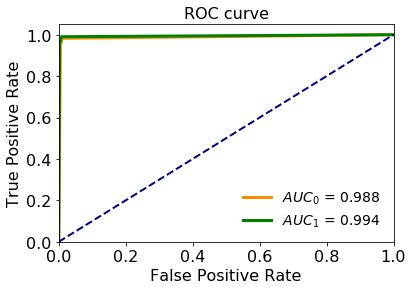

In [75]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Class Weight

Accuracy 0.9926320098239869
F1-score [0.99531981 0.98269231]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1925
           1       0.98      0.99      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



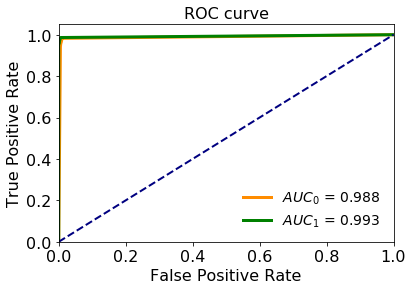

In [76]:
clf = DecisionTreeClassifier(min_samples_leaf=3, class_weight={0:1, 1: 5}, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Meta-Cost Sensitive Classifier (questo non viene)

In [77]:
import  sklearn.model_selection

In [78]:
from costcla.models import CostSensitiveDecisionTreeClassifier
from costcla.metrics import savings_score

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [79]:
cost = [1, 10, 0, 0]
cost_mat = np.array([cost] * len(X_train))
cost_mat.shape

(5699, 4)

In [80]:
cost_mat

array([[ 1, 10,  0,  0],
       [ 1, 10,  0,  0],
       [ 1, 10,  0,  0],
       ...,
       [ 1, 10,  0,  0],
       [ 1, 10,  0,  0],
       [ 1, 10,  0,  0]])

In [81]:
clf = CostSensitiveDecisionTreeClassifier()
clf.fit(X_train, y_train, cost_mat)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

NameError: name 'CostSensitiveDecisionTreeClassifier' is not defined

In [82]:
cost_mat_test = np.array([cost] * len(X_test))
print(savings_score(y_test, y_pred, cost_mat_test))
print(savings_score(y_test, y_pred0, cost_mat_test))

NameError: name 'savings_score' is not defined

# Scikit-plot

In [83]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [84]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9914040114613181
F1-score [0.99456662 0.97943193]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       0.99      0.97      0.98       518

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



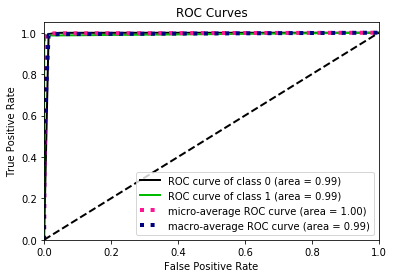

In [85]:
plot_roc(y_test, y_score)
plt.show()

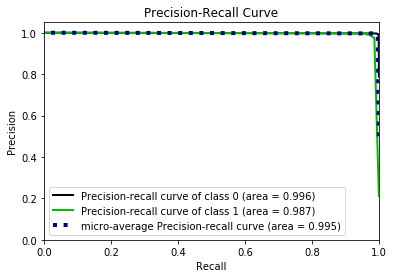

In [86]:
plot_precision_recall(y_test, y_score)
plt.show()

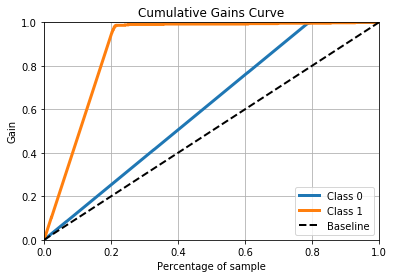

In [87]:
plot_cumulative_gain(y_test, y_score)
plt.show()

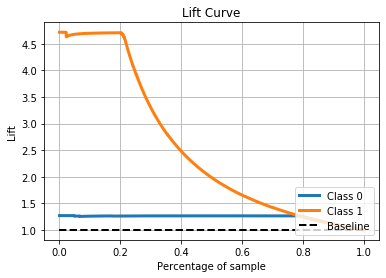

In [88]:
plot_lift_curve(y_test, y_score)
plt.show()

# Linear SVM

In [89]:
from sklearn.svm import LinearSVC

In [90]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.986901350798199
F1-score [0.99162304 0.96998124]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1925
           1       0.94      1.00      0.97       518

    accuracy                           0.99      2443
   macro avg       0.97      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



In [91]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9750306999590668
F1-score [0.98391774 0.9441903 ]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1925
           1       0.90      1.00      0.94       518

    accuracy                           0.98      2443
   macro avg       0.95      0.98      0.96      2443
weighted avg       0.98      0.98      0.98      2443



In [92]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99373368 0.97727273]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1925
           1       0.96      1.00      0.98       518

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [93]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [94]:
support_vectors_pca = pca.transform(support_vectors)

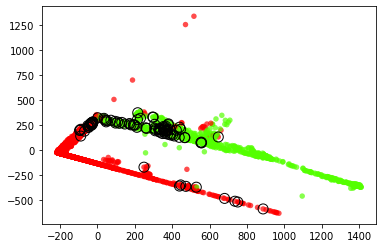

In [98]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

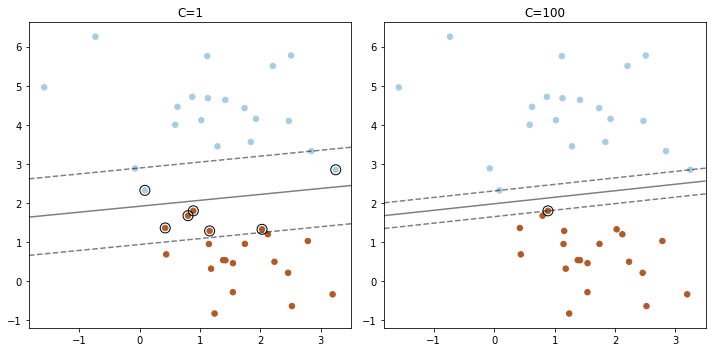

In [99]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# Nonlinear SVM

In [100]:
from sklearn.svm import SVC

In [101]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9611133851821531
F1-score [0.97480774 0.91479821]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1925
           1       0.85      0.98      0.91       518

    accuracy                           0.96      2443
   macro avg       0.92      0.97      0.94      2443
weighted avg       0.97      0.96      0.96      2443



In [102]:
clf = SVC(gamma='auto', C=0.1, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7879656160458453
F1-score [0.88141026 0.        ]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1925
           1       0.00      0.00      0.00       518

    accuracy                           0.79      2443
   macro avg       0.39      0.50      0.44      2443
weighted avg       0.62      0.79      0.69      2443



In [103]:
clf.support_

array([   2,    4,    7, ..., 5681, 5687, 5690])

In [104]:
clf.support_vectors_[:10] # NO BUONOOOOOOO perchè?

array([[2.06000000e+01, 2.61250000e+01, 8.57500000e+01, 4.21000000e+02,
        8.00000000e+00, 1.40000000e+01, 1.00000000e+00],
       [1.97900000e+01, 2.66000000e+01, 3.35000000e+01, 4.24250000e+02,
        8.00000000e+00, 1.60000000e+01, 1.00000000e+00],
       [2.15000000e+01, 2.06000000e+01, 0.00000000e+00, 7.58000000e+02,
        6.00000000e+00, 1.80000000e+01, 0.00000000e+00],
       [1.92000000e+01, 3.11250000e+01, 6.50000000e+00, 4.33500000e+02,
        8.00000000e+00, 8.00000000e+00, 1.00000000e+00],
       [2.23900000e+01, 1.76000000e+01, 1.25000000e+02, 4.42666667e+02,
        7.00000000e+00, 1.40000000e+01, 1.00000000e+00],
       [2.02900000e+01, 3.29666667e+01, 0.00000000e+00, 4.60000000e+02,
        1.00000000e+01, 2.00000000e+00, 0.00000000e+00],
       [2.14725000e+01, 1.99450000e+01, 5.45000000e+01, 7.13400000e+02,
        6.00000000e+00, 1.30000000e+01, 1.00000000e+00],
       [2.27000000e+01, 1.70500000e+01, 1.44750000e+02, 4.42500000e+02,
        7.00000000e+00, 1

In [105]:
clf.n_support_, len(X_train)

(array([1716, 1210]), 5699)

# Effect of Different Kernels (da modificare)

In [117]:

X = X_train
y = y_train


n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Neural network

In [118]:
#Normalization

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Sklearn Multilayer Perceptron

In [121]:
from sklearn.neural_network import MLPClassifier

Parameters

hidden_layer_sizes tuple, length = n_layers - 2, default=(100,) The ith element represents the number of neurons in the ith hidden layer.

activation {'identity', 'logistic', 'tanh', 'relu'}, default='relu' Activation function for the hidden layer.

    'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x
    'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    'tanh', the hyperbolic tan function, returns f(x) = tanh(x).
    'relu', the rectified linear unit function, returns f(x) = max(0, x)

solver {'lbfgs', 'sgd', 'adam'}, default='adam' The solver for weight optimization.

    'lbfgs' is an optimizer in the family of quasi-Newton methods.
    'sgd' refers to stochastic gradient descent.
    'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba The default solver 'adam' works pretty well on relatively large datasets (>= 1000 training samples) in terms of both training time and validation score. For small datasets, 'lbfgs' can converge faster and perform better.

alpha float, default=0.0001 L2 penalty (regularization term) parameter.

batch_size int, default='auto' Size of minibatches for stochastic optimizers. If the solver is 'lbfgs', the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

learning_rate {'constant', 'invscaling', 'adaptive'}, default='constant' Learning rate schedule for weight updates. *'constant' is a constant learning rate given by 'learning_rate_init'. *'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of *'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t) *'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5. Only used when solver='sgd'.

learning_rate_init double, default=0.001 The initial learning rate used. It controls the step-size in updating the weights. Only used when solver='sgd' or 'adam'.

power_t double, default=0.5 The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to 'invscaling'. Only used when solver='sgd'.

max_iter int, default=200 Maximum number of iterations. The solver iterates until convergence (determined by 'tol') or this number of iterations. For stochastic solvers ('sgd', 'adam'), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

shuffle bool, default=True Whether to shuffle samples in each iteration. Only used when solver='sgd' or 'adam'.

random_state int, RandomState instance or None, default=None If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

tol float, default=1e-4 Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to 'adaptive', convergence is considered to be reached and training stops.

verbose bool, default=False Whether to print progress messages to stdout.

warm_start bool, default=False When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

momentum float, default=0.9 Momentum for gradient descent update. Should be between 0 and 1. Only used when solver='sgd'.

early_stopping bool, default=False Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting. Only effective when solver='sgd' or 'adam'

validation_fraction float, default=0.1 The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True

beta_1 float, default=0.9 Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver='adam'

beta_2 float, default=0.999 Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver='adam'

epsilon float, default=1e-8 Value for numerical stability in adam. Only used when solver='adam'

n_iter_no_change int, default=10 Maximum number of epochs to not meet tol improvement. Only effective when solver='sgd' or 'adam'
Attributes

loss_ float The current loss computed with the loss function.

coefs_ list, length n_layers - 1 The ith element in the list represents the weight matrix corresponding to layer i.

intercepts_ list, length n_layers - 1 The ith element in the list represents the bias vector corresponding to layer i + 1.

n_iter_ int, The number of iterations the solver has ran.

n_layers_ int Number of layers.

n_outputs_ int Number of outputs.

out_activation_ string Name of the output activation function